In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, acovf, pacf,pacf_ols,pacf_yw
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
data = pd.read_excel('/content/price_dataset (1).xlsx', index_col='date', parse_dates=True)

In [ ]:
cp = pd.read_excel('/content/CPI Food.xlsx', index_col='date', parse_dates=True)

In [ ]:
data1 = data.copy()

In [ ]:
cp1 = cp.copy()

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15891 entries, 2025-03-03 to 2017-11-03
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   class    15891 non-null  object 
 1   item     15891 non-null  object 
 2   variety  15891 non-null  object 
 3   rate     15809 non-null  float64
 4   unit     15843 non-null  object 
dtypes: float64(1), object(4)
memory usage: 744.9+ KB


In [ ]:
cp1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 99 entries, 2017-01-01 to 2025-03-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cpi price  99 non-null     float64
dtypes: float64(1)
memory usage: 1.5 KB


In [ ]:
data1.isnull().sum()

,0
class,0
item,0
variety,0
rate,82
unit,48


In [ ]:
cp1.isnull().sum()

,0
cpi price,0


In [ ]:
data1[data1.isnull().any(axis=1)]

,class,item,variety,rate,unit
date,,,,,
2025-03-03,fruit,apples,braeburn,NaN,kg
2020-12-18,fruit,apples,bramleys_seedling,NaN,kg
2020-12-18,fruit,apples,coxs_orange_group,NaN,kg
2020-12-18,fruit,apples,egremont_russet,NaN,kg
2020-12-18,fruit,apples,braeburn,NaN,kg
2020-12-18,fruit,apples,gala,NaN,kg
2020-12-18,fruit,apples,other_late_season,NaN,kg
2020-12-18,fruit,pears,conference,NaN,kg
2020-12-18,fruit,pears,doyenne_du_comice,NaN,kg


In [ ]:
cp1.index

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
      

In [ ]:
cp1.head()

,cpi price
date,
2017-01-01,98.2
2017-02-01,98.9
2017-03-01,99.5
2017-04-01,99.7
2017-05-01,99.8


In [ ]:
# prompt: how to list out all the items in class column and row column

print(data1['class'].unique())
print(data1['item'].unique())

['fruit' 'vegetable' 'cut_flowers' 'pot_plants']
['apples' 'pears' 'asparagus' 'beetroot' 'brussels_sprouts' 'pak_choi'
 'curly_kale' 'cabbage' 'spring_greens' 'carrots' 'cauliflower' 'celeriac'
 'leeks' 'lettuce' 'onion' 'swede' 'turnip' 'parsnips' 'rhubarb' 'tulips'
 'cucumbers' 'chinese_leaf' 'tomatoes' 'strawberries' 'celery' 'calabrese'
 'spinach_leaf' 'blackberries' 'coriander' 'raspberries' 'capsicum'
 'beans' 'rocket' 'mixed_babyleaf_salad' 'sweetcorn' 'blueberries'
 'courgettes' 'peas' 'plums' 'cherries' 'currants' 'gladioli'
 'gooseberries' 'watercress' 'alstromeria' 'lillies' 'narcissus'
 'cyclamen' 'poinsettia' 'chrysanthemum' 'geranium' 'stocks'
 'sweet_williams' 'peony']


In [ ]:
# prompt: how to drop some columns

# Drop columns 'variety' and 'unit'
data1 = data1.drop(['variety', 'unit'], axis=1)


In [ ]:
data1.head()

,class,item,rate
date,,,
2025-03-03,fruit,apples,1.38
2025-03-03,fruit,apples,1.32
2025-03-03,fruit,apples,1.20
2025-03-03,fruit,apples,NaN
2025-03-03,fruit,apples,1.24


In [ ]:
data1.isnull().sum()

,0
class,0
item,0
rate,82


In [ ]:
data1.info()
data1.head()

# Filter the DataFrame to include only rows where 'class' is 'vegetable'
data1 = data1[data1['class'] == 'vegetable']

print(data1['class'].unique())
print(data1['item'].unique())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15891 entries, 2025-03-03 to 2017-11-03
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   15891 non-null  object 
 1   item    15891 non-null  object 
 2   rate    15809 non-null  float64
dtypes: float64(1), object(2)
memory usage: 496.6+ KB
['vegetable']
['asparagus' 'beetroot' 'brussels_sprouts' 'pak_choi' 'curly_kale'
 'cabbage' 'spring_greens' 'carrots' 'cauliflower' 'celeriac' 'leeks'
 'lettuce' 'onion' 'swede' 'turnip' 'parsnips' 'rhubarb' 'cucumbers'
 'chinese_leaf' 'tomatoes' 'celery' 'calabrese' 'spinach_leaf' 'coriander'
 'capsicum' 'beans' 'rocket' 'mixed_babyleaf_salad' 'sweetcorn'
 'courgettes' 'peas' 'watercress']


In [ ]:
data1.head()

,class,item,rate
date,,,
2025-03-03,vegetable,asparagus,19.37
2025-03-03,vegetable,beetroot,0.66
2025-03-03,vegetable,brussels_sprouts,1.16
2025-03-03,vegetable,pak_choi,3.58
2025-03-03,vegetable,curly_kale,4.51


In [ ]:
data1.isnull().sum()

,0
class,0
item,0
rate,60


In [ ]:
print(data1['rate'])

date
2025-03-03     19.37
2025-03-03      0.66
2025-03-03      1.16
2025-03-03      3.58
2025-03-03      4.51
2025-03-03      0.60
2025-03-03     19.37
2025-03-03      0.66
2025-03-03      1.16
2025-03-03      3.58
2025-03-03      4.51
2025-03-03      0.60
2025-03-03      0.71
2025-03-03      1.80
2025-03-03      0.51
2025-03-03      0.66
2025-03-03      0.43
2025-03-03      0.85
2025-03-03      0.79
2025-03-03      1.48
2025-03-03      0.55
2025-03-03      0.90
2025-03-03      0.48
2025-03-03      0.66
2025-03-03      0.29
2025-03-03      1.70
2025-03-03      1.02
2025-03-03      7.24
2025-02-17      0.70
2025-02-17      1.17
2025-02-17      3.62
2025-02-17      4.44
2025-02-17      0.59
2025-02-17      0.66
2025-02-17      1.95
2025-02-17      0.51
2025-02-17      0.67
2025-02-17      0.49
2025-02-17      1.09
2025-02-17      0.83
2025-02-17      1.29
2025-02-17      1.49
2025-02-17      0.52
2025-02-17      0.86
2025-02-17      0.57
2025-02-17      0.70
2025-02-17      0.31
2025-02-

In [ ]:
data1.head()

,class,item,rate
date,,,
2025-03-03,vegetable,asparagus,19.37
2025-03-03,vegetable,beetroot,0.66
2025-03-03,vegetable,brussels_sprouts,1.16
2025-03-03,vegetable,pak_choi,3.58
2025-03-03,vegetable,curly_kale,4.51


In [ ]:


# Convert 'date' column to datetime objects if it's not already
#data1['date'] = pd.to_datetime(data1['date'])

# Set 'date' column as the index
#data1 = data1.set_index('date')

# Now you can use the date as the index for time series analysis
#print(data1.head())

# Example: Access data for a specific date
# print(data1.loc['2021-01-01']) # Replace '2021-01-01' with your desired date

# Example: Resample data to a different frequency (e.g., monthly)
# monthly_data = data1.resample('M').mean()  # Replace 'M' with 'W' for weekly, 'D' for daily, etc.

# print(monthly_data.head())


In [ ]:
# to remove duplicate rows
data1.drop_duplicates(inplace=True)

In [ ]:
cp1.drop_duplicates(inplace=True)

In [ ]:
#this function helps to remove the space in the figure
# at initail stage the function did not work due to the space in the table
data1.columns = data1.columns.str.strip()

In [ ]:
cp1.columns = cp1.columns.str.strip()

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(data1['rate'])


date
2025-03-03     19.37
2025-03-03      0.66
2025-03-03      1.16
2025-03-03      3.58
2025-03-03      4.51
2025-03-03      0.60
2025-03-03      0.71
2025-03-03      1.80
2025-03-03      0.51
2025-03-03      0.66
2025-03-03      0.43
2025-03-03      0.85
2025-03-03      0.79
2025-03-03      1.48
2025-03-03      0.55
2025-03-03      0.90
2025-03-03      0.48
2025-03-03      0.66
2025-03-03      0.29
2025-03-03      1.70
2025-03-03      1.02
2025-03-03      7.24
2025-02-17      0.70
2025-02-17      1.17
2025-02-17      3.62
2025-02-17      4.44
2025-02-17      0.59
2025-02-17      1.95
2025-02-17      0.67
2025-02-17      0.49
2025-02-17      1.09
2025-02-17      0.83
2025-02-17      1.29
2025-02-17      1.49
2025-02-17      0.52
2025-02-17      0.86
2025-02-17      0.57
2025-02-17      0.70
2025-02-17      0.31
2025-02-17      1.43
2025-02-17      1.01
2025-02-17      6.48
2025-02-03      0.69
2025-02-03      1.18
2025-02-03      4.47
2025-02-03      0.57
2025-02-03      1.76
2025-02-

In [ ]:
# Set the desired date format
date_format = '%Y-%m-%d'  # Example: YYYY-MM-DD

In [ ]:
data1.head()

,class,item,rate
date,,,
2025-03-03,vegetable,asparagus,19.37
2025-03-03,vegetable,beetroot,0.66
2025-03-03,vegetable,brussels_sprouts,1.16
2025-03-03,vegetable,pak_choi,3.58
2025-03-03,vegetable,curly_kale,4.51


In [ ]:
cp1.isnull().sum()

,0
cpi price,0


In [ ]:
data1.isnull().sum()

,0
class,0
item,0
rate,30


In [ ]:
# prompt: how to perform forwardfill

# Forward fill missing 'rate' values
data1['rate'] = data1['rate'].ffill()
data1['rate'] = data1['rate'].ffill(axis = 0)

# Check for remaining missing values
print(data1.isnull().sum())


class    0
item     0
rate     0
dtype: int64


In [ ]:
data1.head()

,class,item,rate
date,,,
2025-03-03,vegetable,asparagus,19.37
2025-03-03,vegetable,beetroot,0.66
2025-03-03,vegetable,brussels_sprouts,1.16
2025-03-03,vegetable,pak_choi,3.58
2025-03-03,vegetable,curly_kale,4.51


In [ ]:
data11 = data1.copy()

In [ ]:
data11.head()

,class,item,rate
date,,,
2025-03-03,vegetable,asparagus,19.37
2025-03-03,vegetable,beetroot,0.66
2025-03-03,vegetable,brussels_sprouts,1.16
2025-03-03,vegetable,pak_choi,3.58
2025-03-03,vegetable,curly_kale,4.51


In [ ]:
# Drop columns 'item'
data1 = data1.drop(['item'], axis=1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file = '/content/drive/MyDrive/price_dataset (1).xlsx'

In [ ]:
import pathlib
file = pathlib.Path(file)

In [ ]:
book = pd.read_excel('/content/drive/MyDrive/price_dataset (1).xlsx', index_col='date', parse_dates=True)

In [ ]:
book.head()

,class,item,variety,rate,unit
date,,,,,
2025-03-03,fruit,apples,bramleys_seedling,1.38,kg
2025-03-03,fruit,apples,coxs_orange_group,1.32,kg
2025-03-03,fruit,apples,egremont_russet,1.20,kg
2025-03-03,fruit,apples,braeburn,NaN,kg
2025-03-03,fruit,apples,gala,1.24,kg


In [ ]:
data1.head()

,class,rate
date,,
2025-03-03,vegetable,19.37
2025-03-03,vegetable,0.66
2025-03-03,vegetable,1.16
2025-03-03,vegetable,3.58
2025-03-03,vegetable,4.51


In [ ]:
cp1.head()

,cpi price
date,
2017-01-01,98.2
2017-02-01,98.9
2017-03-01,99.5
2017-04-01,99.7
2017-05-01,99.8


In [ ]:
# prompt: how do i make my cpi date the accepted date format

import pandas as pd
# Convert the index to datetime objects with the desired format
cp1.index = pd.to_datetime(cp1.index, format=date_format, errors='coerce')

# Check for any invalid dates that couldn't be converted
print(cp1[cp1.index.isnull()])



Empty DataFrame
Columns: [cpi price]
Index: []


In [ ]:
data1['rate'].resample('ME').sum()

,rate
date,
2017-11-30,61.60
2017-12-31,56.93
2018-01-31,51.61
2018-02-28,58.67
2018-03-31,101.71
2018-04-30,94.11
2018-05-31,112.83
2018-06-30,88.39
2018-07-31,81.18


In [ ]:
cpp = cp1['cpi price']
cpp

,cpi price
date,
2017-01-01,98.2
2017-02-01,98.9
2017-03-01,99.5
2017-04-01,99.7
2017-05-01,99.8
2017-08-01,99.6
2017-09-01,100.4
2017-10-01,101.0
2017-11-01,101.6


In [ ]:
cpp.resample('MS').sum()

,cpi price
date,
2017-01-01,98.2
2017-02-01,98.9
2017-03-01,99.5
2017-04-01,99.7
2017-05-01,99.8
2017-06-01,0.0
2017-07-01,0.0
2017-08-01,99.6
2017-09-01,100.4


<Axes: xlabel='date'>

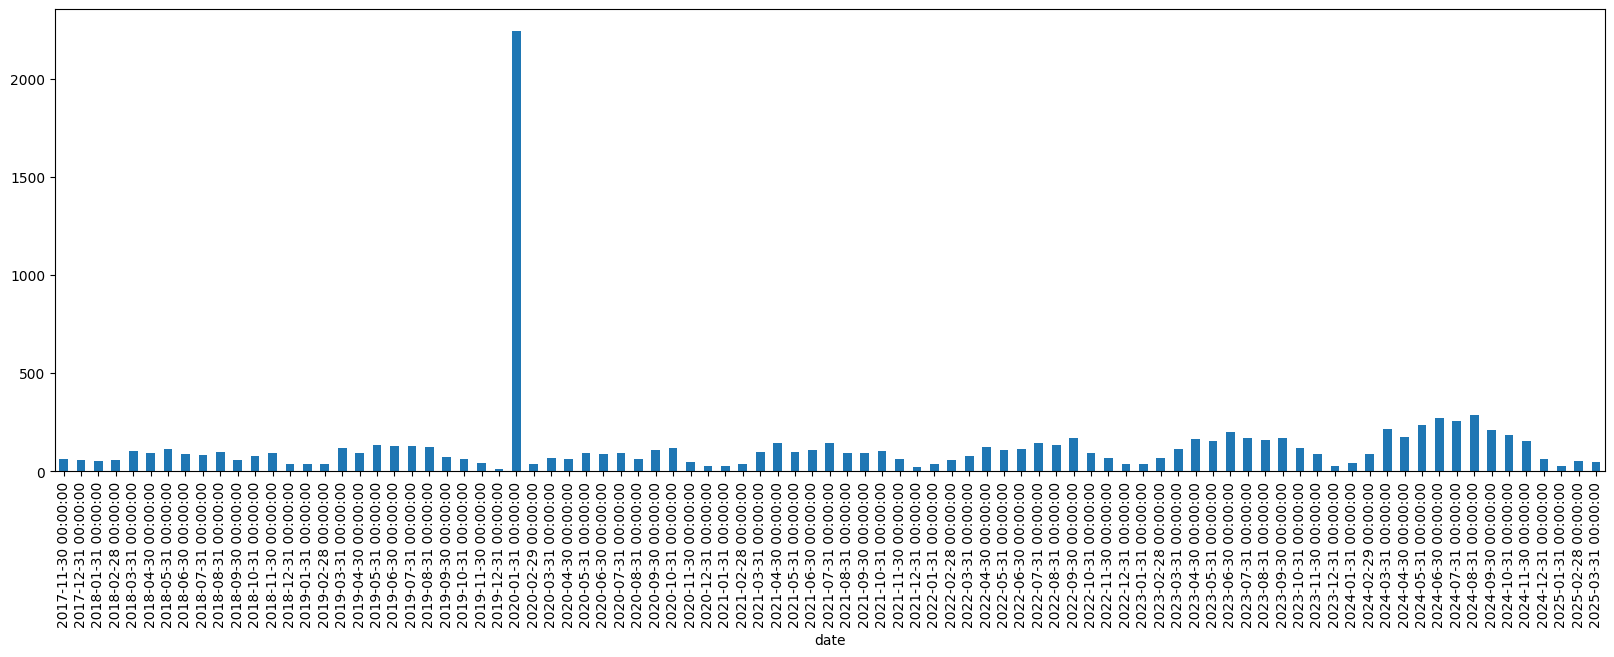

In [ ]:
data1['rate'].resample('ME').sum().plot.bar(figsize=(20, 6))

<Axes: xlabel='date'>

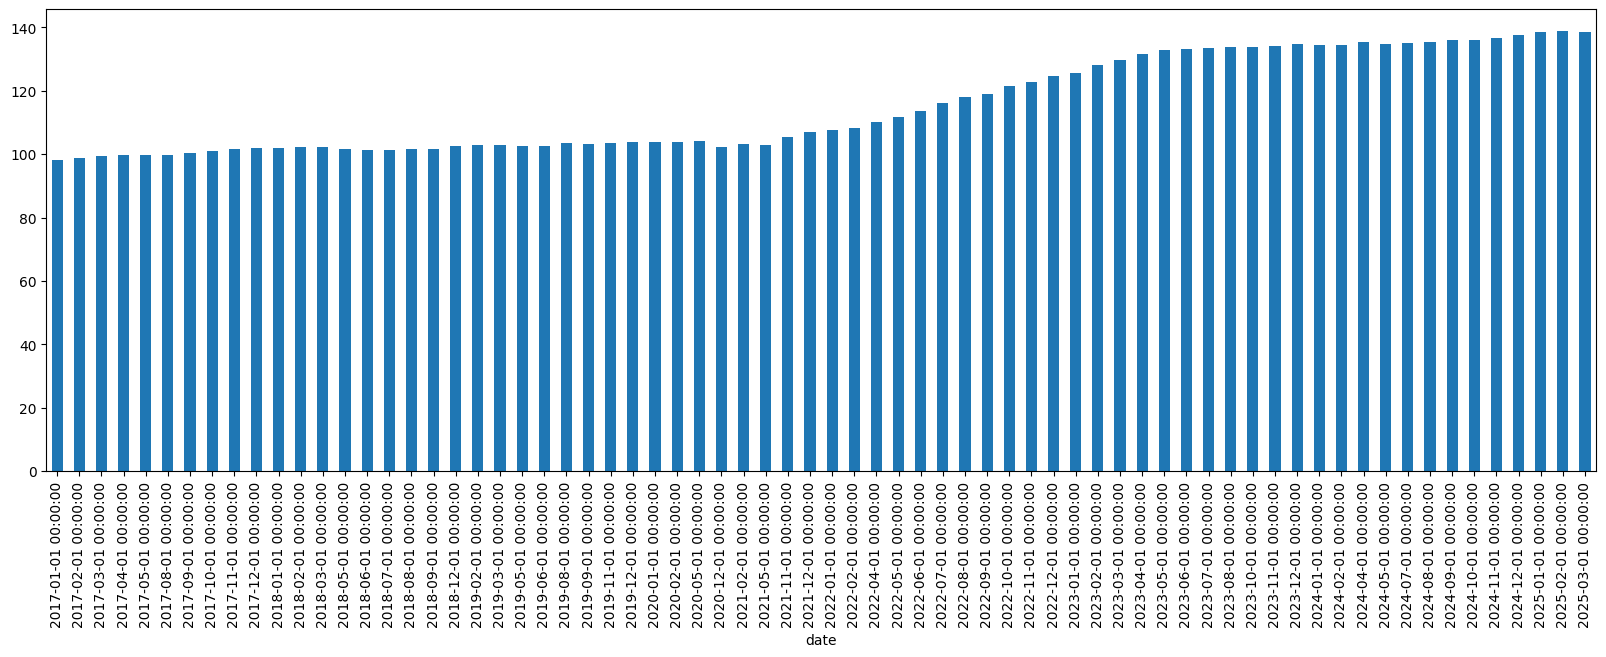

In [ ]:
cp1['CPI price'].plot.bar(figsize=(20,6))

<Axes: xlabel='date'>

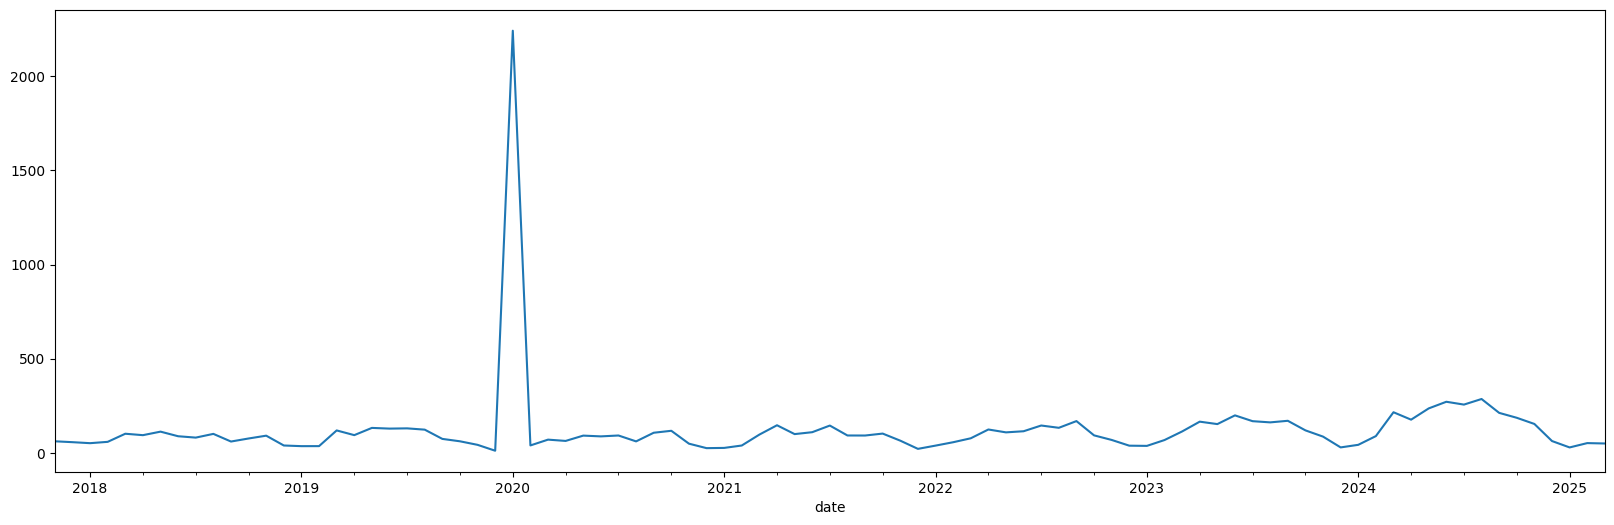

In [ ]:
data2 = data1['rate'].resample('ME').sum()
data2.plot(figsize=(20, 6))

<Axes: xlabel='date'>

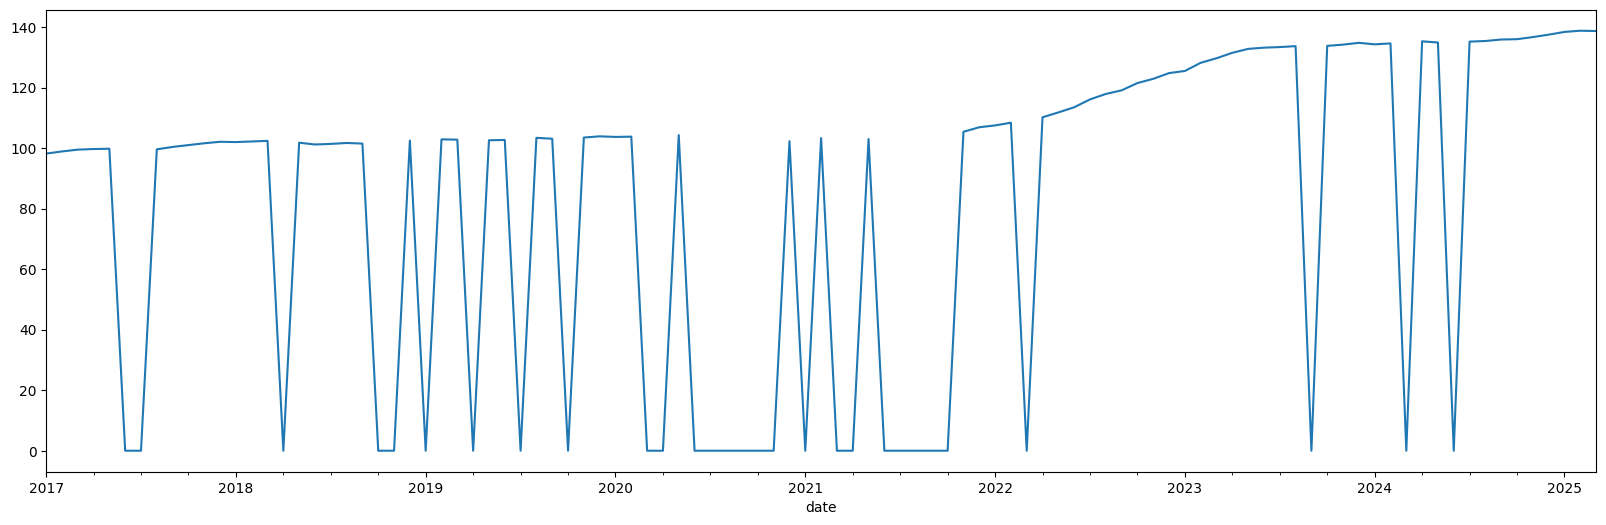

In [ ]:
cp1['CPI price'].resample('ME').sum().plot(figsize=(20, 6))

In [ ]:
data2.head()

,rate
date,
2017-11-30,61.60
2017-12-31,56.93
2018-01-31,51.61
2018-02-28,58.67
2018-03-31,101.71


***OUTLIERS***

In [ ]:
Q1 = data2.quantile(0.25)
Q3 = data2.quantile(0.75)
IQR = Q3 - Q1

# Define Outlier Thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find Outliers
outliers = data2[(data2 < lower_bound) | (data2 > upper_bound)]
print(outliers)

date
2020-01-31    2240.88
2024-06-30     271.42
2024-07-31     256.40
2024-08-31     286.08
Name: rate, dtype: float64


<Axes: >

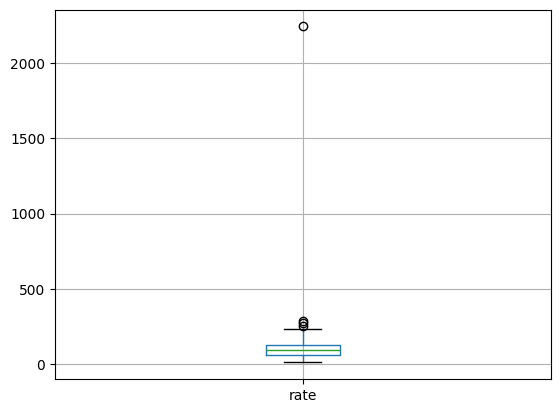

In [ ]:
 #you can convert the Series to a DataFrame if needed
data2_df = pd.DataFrame(data2)
data2_df.boxplot()

In [ ]:
# this function helped in eliminating the outliers
data2_df['rate'] = np.where((data2_df['rate'] < lower_bound) | (data2_df['rate'] > upper_bound),
                                   data2_df['rate'].median(), data2_df['rate'])

In [ ]:
data2_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2017-11-30 to 2025-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rate    89 non-null     float64
dtypes: float64(1)
memory usage: 1.4 KB


<Axes: >

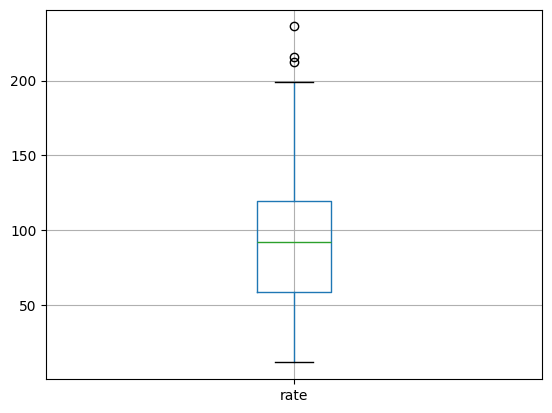

In [ ]:
data2_df.boxplot()

In [ ]:
# applying a stroger oytlier removal for the extreme outliers
data2_df = data2_df[(data2_df['rate'] >= lower_bound) & (data2_df['rate'] <= upper_bound)]


<Axes: >

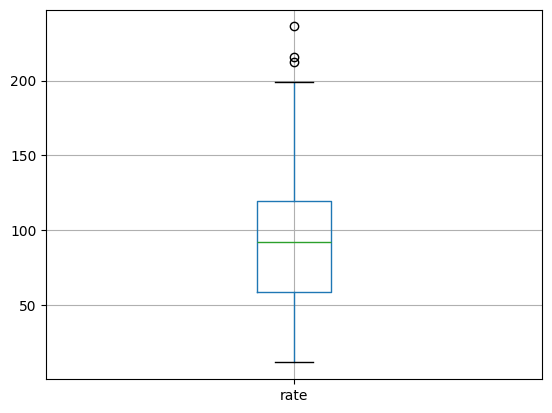

In [ ]:
data2_df.boxplot()

In [ ]:
from scipy import stats
# You could apply z-score filtering to force the data more "tight"
data2_df = data2_df[(np.abs(stats.zscore(data2_df['rate'])) < 2.5)]  # tighter than 3


<Axes: >

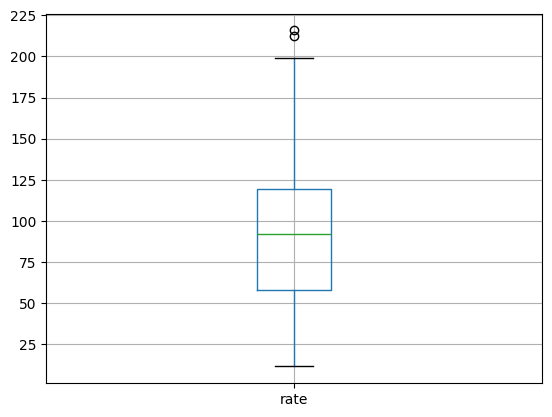

In [ ]:
data2_df.boxplot()

In [ ]:
data2_df.describe()

,rate
count,88.000000
mean,93.077727
std,46.745595
min,11.550000
25%,58.235000
50%,92.295000
75%,119.332500
max,215.790000


<Axes: xlabel='date'>

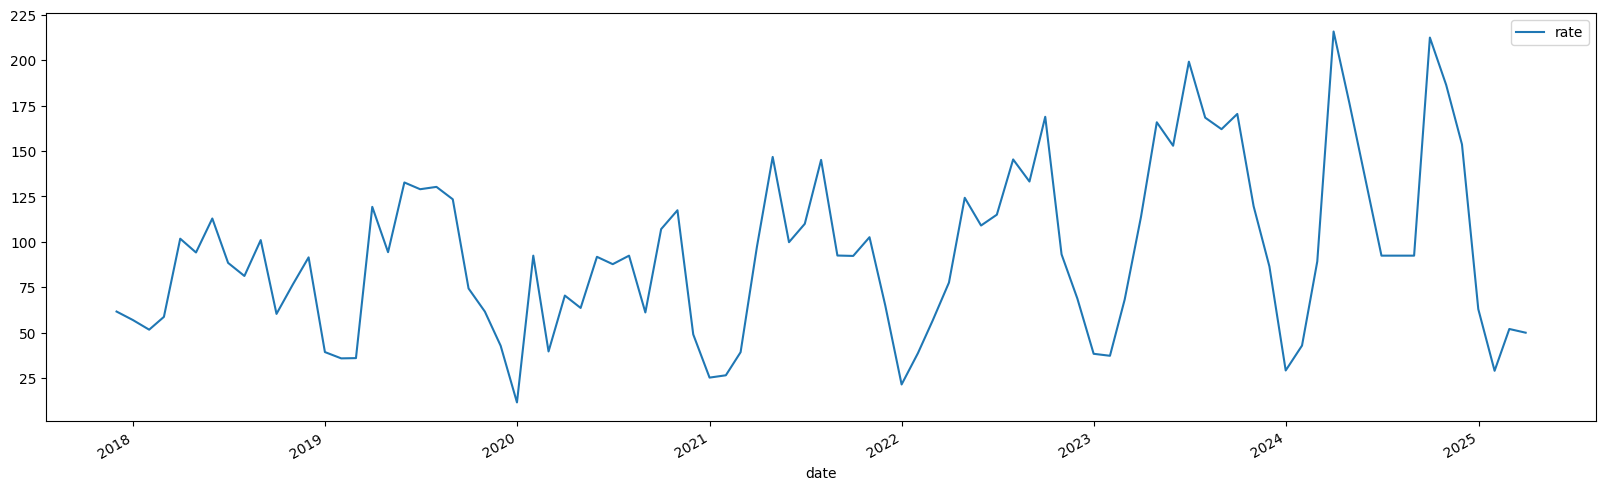

In [ ]:
data2_df.plot(figsize=(20, 6))

***VISUALISATION***

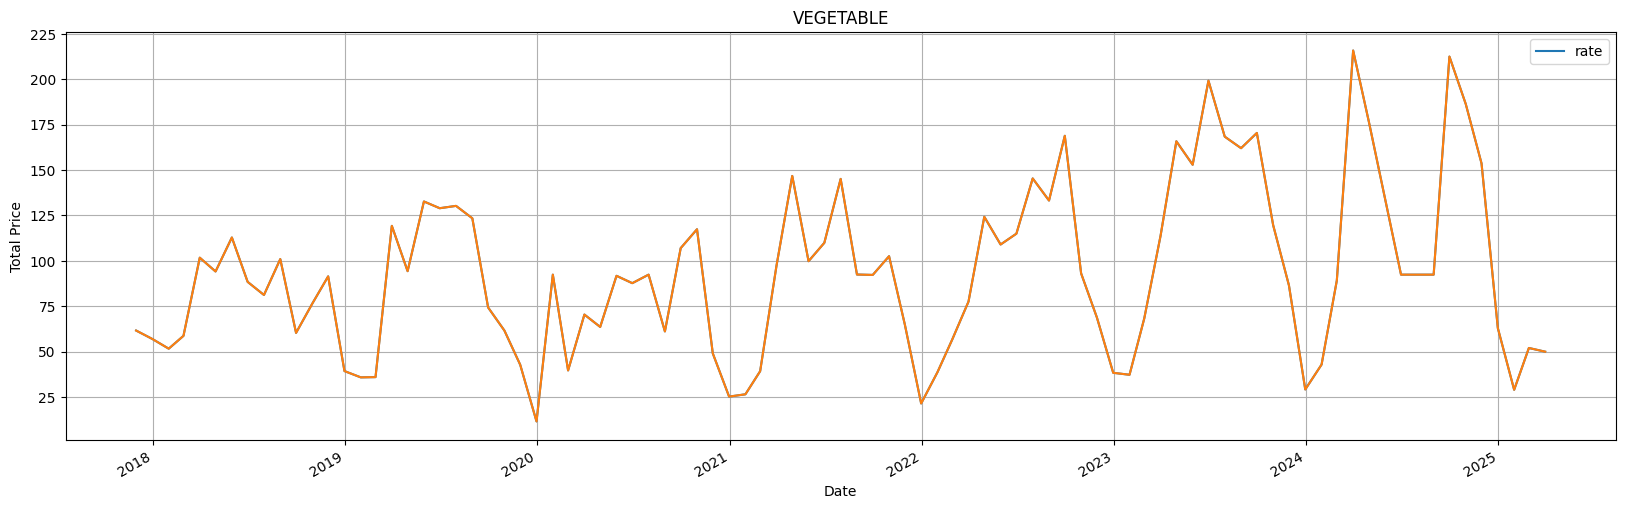

In [ ]:
data2_df.plot(figsize=(20,6))
title='VEGETABLE'
xlabel='Date'
ylabel = 'Total Price'
ax = data2_df['rate'].plot(title=title) # Assign the Axes object to ax
ax.set(xlabel=xlabel)
ax.set(ylabel=ylabel)
ax.grid(True)
plt.show()

In [ ]:
data3 = data2_df.copy()

In [ ]:
# prompt: how to perform shapiro testing for normalisation

from scipy.stats import shapiro

# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(data3['rate'])

print(f"Shapiro-Wilk Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level

if p_value > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")


Shapiro-Wilk Test Statistic: 0.9631478096934143
P-value: 0.013304827100346117
Sample does not look Gaussian (reject H0)


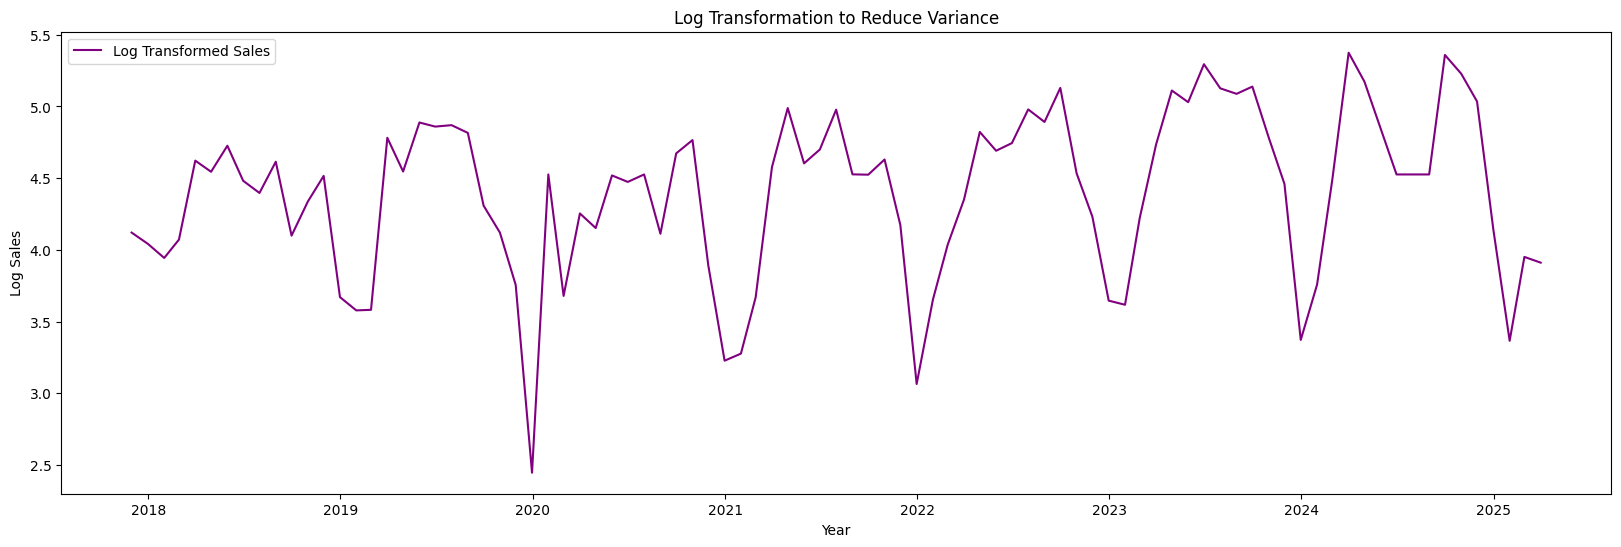

In [ ]:
data3_log = data3.copy()
data3_log['rate'] = np.log(data3_log['rate'])

# Plot Log Transformed Data
plt.figure(figsize=(20,6))
plt.plot(data3_log, label="Log Transformed Sales", color="purple")
plt.title("Log Transformation to Reduce Variance")
plt.xlabel("Year")
plt.ylabel("Log Sales")
plt.legend()
plt.show()

In [ ]:
#Box-cox transformation for normalisation
data3_boxcox = data3.copy()
data3_boxcox['rate'], lambda_bc = stats.boxcox(data3_boxcox['rate'].dropna())  # Box-Cox requires positive values

print("Box-Cox Lambda:", lambda_bc)


Box-Cox Lambda: 0.45875916577416576


In [ ]:
from scipy.stats import boxcox
# since the Box-Cos is closer to 0 than to 1 log transformation iis required
data3_fit = data3.copy()
# Apply Box-Cox transformation
data3_fit['rate_transformed'], fitted_lambda = boxcox(data3_fit['rate'].dropna())
print('Fitted Lambda:', fitted_lambda)


Fitted Lambda: 0.45875916577416576


In [ ]:
from scipy.special import boxcox1p

# Assuming 'Sales' is the column you want to transform
# And your fitted lambda is already known

Fitted_Lambda = 0.45875916577416576


# Apply transformation
data2_df['rate_transformed'] = boxcox1p(data2_df['rate'], fitted_lambda)

# Check the result
print(data2_df[['rate', 'rate_transformed']].head())

              rate  rate_transformed
date                                
2017-11-30   61.60         12.361740
2017-12-31   56.93         11.853623
2018-01-31   51.61         11.246963
2018-02-28   58.67         12.045447
2018-03-31  101.71         16.070129


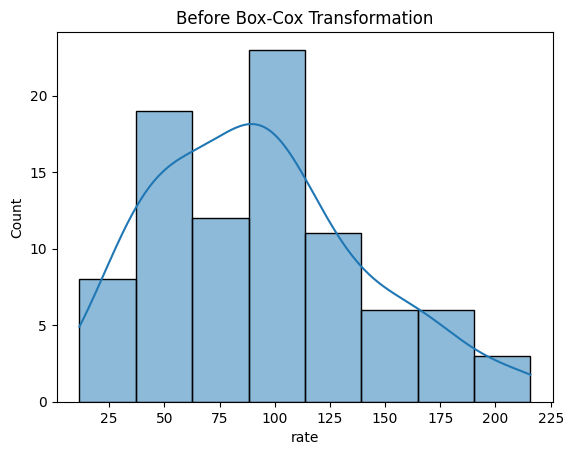

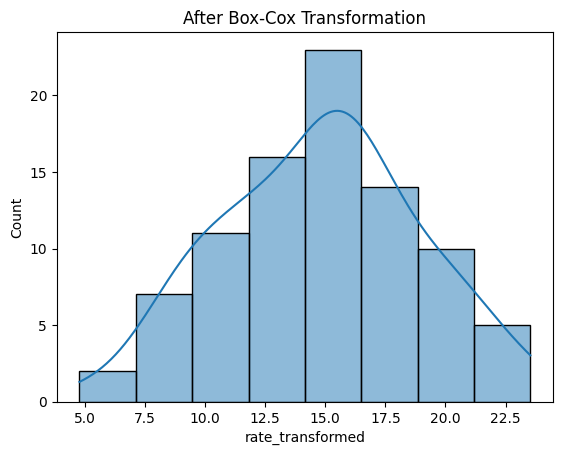

In [ ]:
# Before
sns.histplot(data2_df['rate'], kde=True)
plt.title('Before Box-Cox Transformation')
plt.show()

# After
sns.histplot(data2_df['rate_transformed'], kde=True)
plt.title('After Box-Cox Transformation')
plt.show()

In [ ]:
from scipy.stats import shapiro

# Example on your transformed series
stat, p = shapiro(data2_df['rate_transformed'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Statistics=0.989, p=0.665
Sample looks Gaussian (fail to reject H0)


***SEASONAL DECOMPOSITION ON TRANFORMED SERIES***

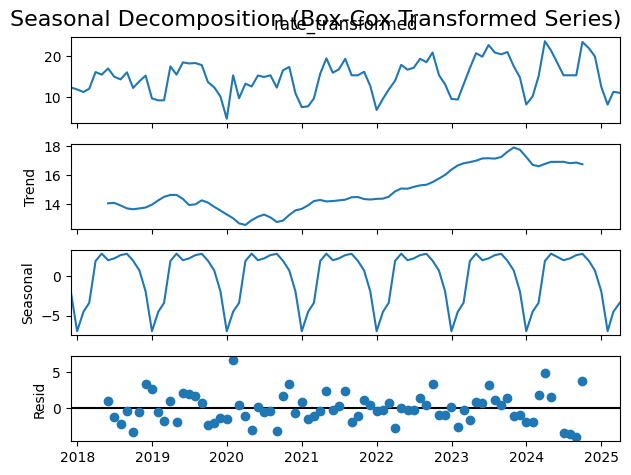

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose the transformed series
decomposition = seasonal_decompose(data2_df['rate_transformed'], model='additive', period=12)

# Plot decomposition
decomposition.plot()
plt.suptitle('Seasonal Decomposition (Box-Cox Transformed Series)', fontsize=16)
plt.show()


**HPFILTER ON TRANSFORMED SERIES**

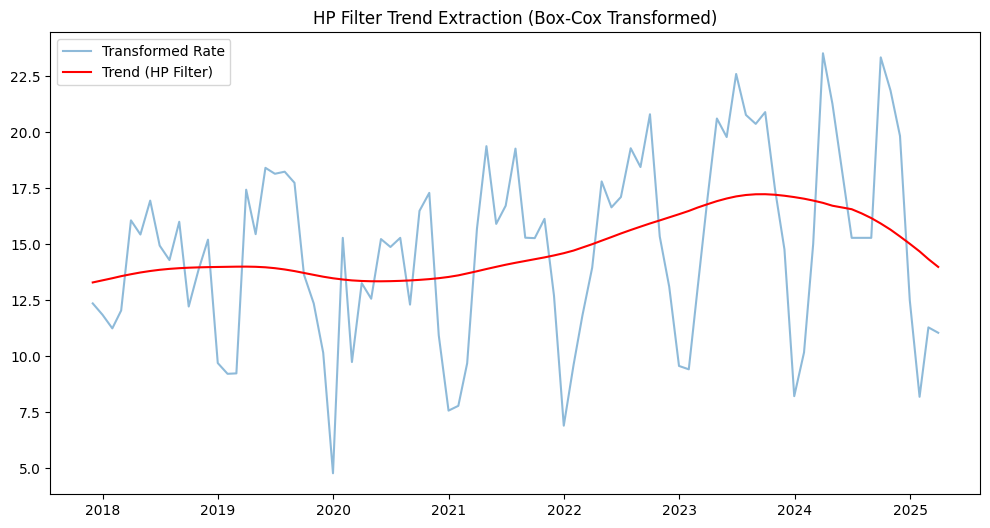

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter

# Apply HP filter
cycle, trend = hpfilter(data2_df['rate_transformed'], lamb=1600)  # adjust lambda if needed

# Plot
plt.figure(figsize=(12,6))
plt.plot(data2_df.index, data2_df['rate_transformed'], label='Transformed Rate', alpha=0.5)
plt.plot(trend, label='Trend (HP Filter)', color='red')
plt.title('HP Filter Trend Extraction (Box-Cox Transformed)')
plt.legend()
plt.show()


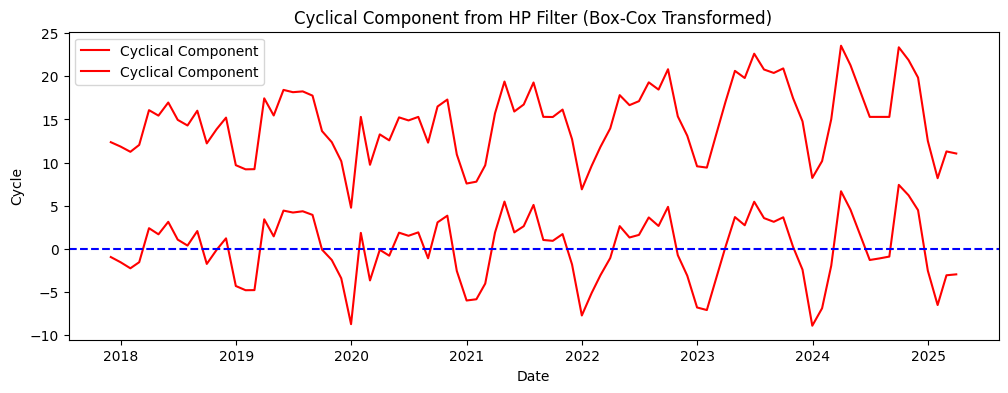

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(data2_df.index, data2_df['rate_transformed'], cycle, label="Cyclical Component", color="red")
plt.axhline(y=0, color="blue", linestyle="dashed")  # Zero line
plt.xlabel("Date")
plt.ylabel("Cycle")
plt.title("Cyclical Component from HP Filter (Box-Cox Transformed)")
plt.legend()
plt.show()

***SMOOTHING TECHNIQUES WITH ROLLING MEAN ***

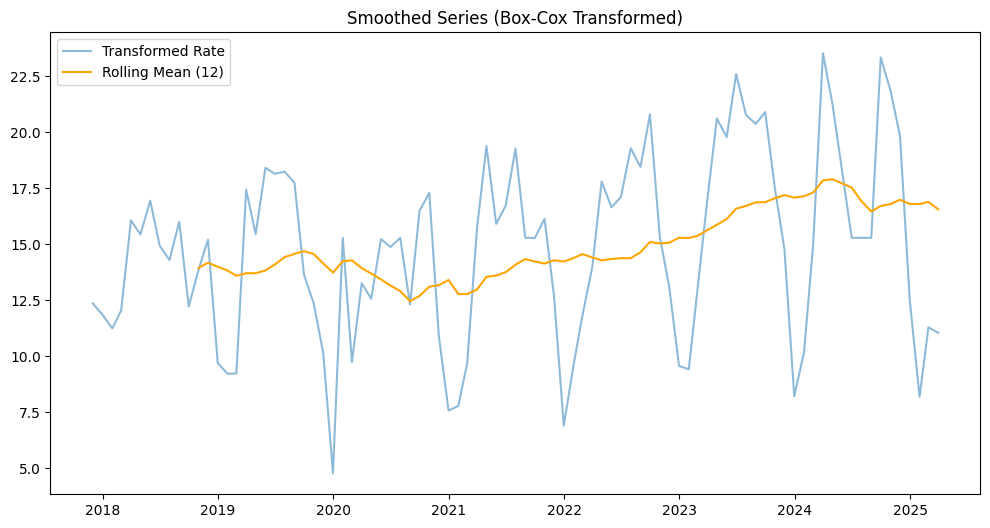

In [ ]:
# Rolling mean smoothing
data2_df['rolling_mean_transformed'] = data2_df['rate_transformed'].rolling(window=12).mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(data2_df['rate_transformed'], label='Transformed Rate', alpha=0.5)
plt.plot(data2_df['rolling_mean_transformed'], label='Rolling Mean (12)', color='orange')
plt.title('Smoothed Series (Box-Cox Transformed)')
plt.legend()
plt.show()


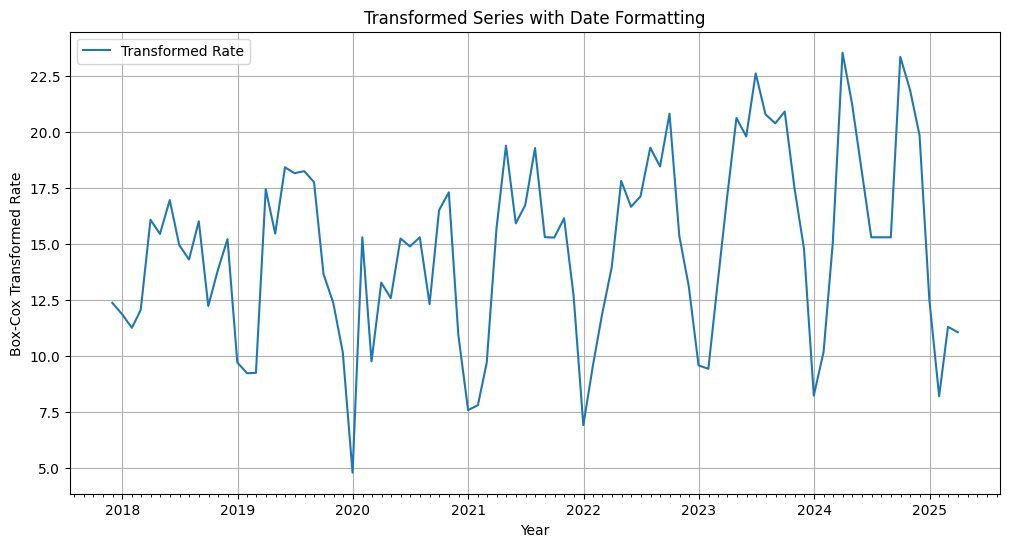

In [ ]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(data2_df['rate_transformed'], label='Transformed Rate')

# Setting major and minor ticks
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.title('Transformed Series with Date Formatting')
plt.xlabel('Year')
plt.ylabel('Box-Cox Transformed Rate')
plt.grid()
plt.legend()
plt.show()


STATIONARITY

In [ ]:
adfuller(data2_df['rate_transformed'])

(-0.8439601791421845,
 0.8058669474422422,
 11,
 76,
 {'1%': -3.5194805351545413,
  '5%': -2.9003945086747343,
  '10%': -2.5874984279778395},
 379.086792948882)

In [ ]:
from statsmodels.tsa.stattools import adfuller

# ADF Test
adf_result = adfuller(data2_df['rate_transformed'])

print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
for key, value in adf_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


ADF Statistic: -0.843960
p-value: 0.805867
Critial Values:
   1%, -3.5194805351545413
Critial Values:
   5%, -2.9003945086747343
Critial Values:
   10%, -2.5874984279778395


In [ ]:
# Perform the Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(data2_df['rate_transformed'])

# Extract ADF test results
adf_output = {

    "p-value": adf_result[1],

    "Stationary (p < 0.05)": "Yes" if adf_result[1] < 0.05 else "No"
}

# Convert results to DataFrame for better visualization
adf_df = pd.DataFrame(adf_output.items(), columns=["Metric", "Value"])

# Display ADF test results
adf_df

,Metric,Value
0,p-value,0.805867
1,Stationary (p < 0.05),No


In [ ]:
data3_df = data2_df.copy()

In [ ]:
# First order differencing
data2_df['rate_transformed_diff'] = data2_df['rate_transformed'].diff()

# Drop NA values created by differencing
data2_df['rate_transformed_diff'] = data2_df['rate_transformed_diff'].dropna()



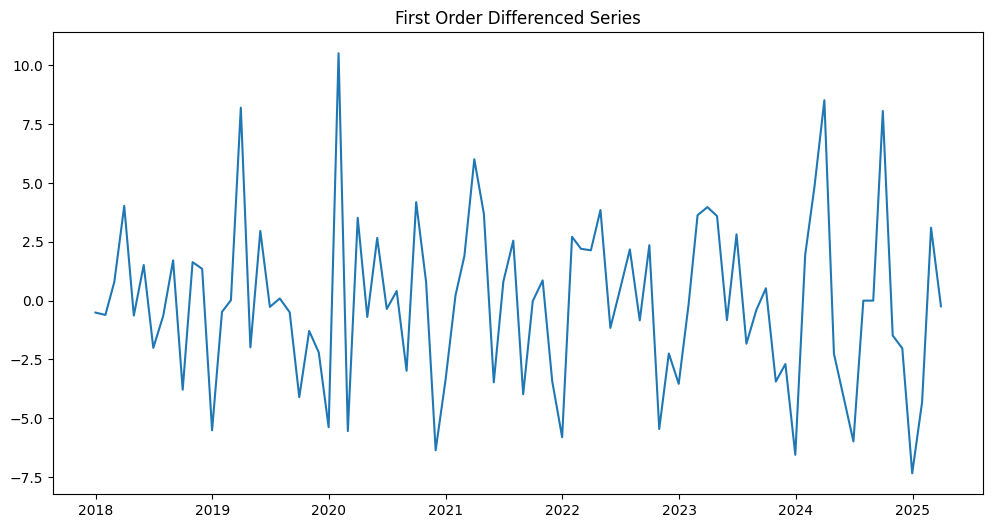

In [ ]:

# Plot the differenced series
plt.figure(figsize=(12,6))
plt.plot(data2_df['rate_transformed_diff'])
plt.title('First Order Differenced Series')
plt.show()

In [ ]:
# First order differencing
data2_df['rate_transformed_diff'] = data2_df['rate_transformed'].diff()

# Drop NA values created by differencing, but do not modify the original DataFrame
rate_transformed_diff_dropna = data2_df['rate_transformed_diff'].dropna()

# Apply ADF Test again on differenced series without NaNs
from statsmodels.tsa.stattools import adfuller
adf_result_diff = adfuller(rate_transformed_diff_dropna)

print('ADF Statistic (Differenced): %f' % adf_result_diff[0])
print('p-value (Differenced): %f' % adf_result_diff[1])

ADF Statistic (Differenced): -8.030922
p-value (Differenced): 0.000000


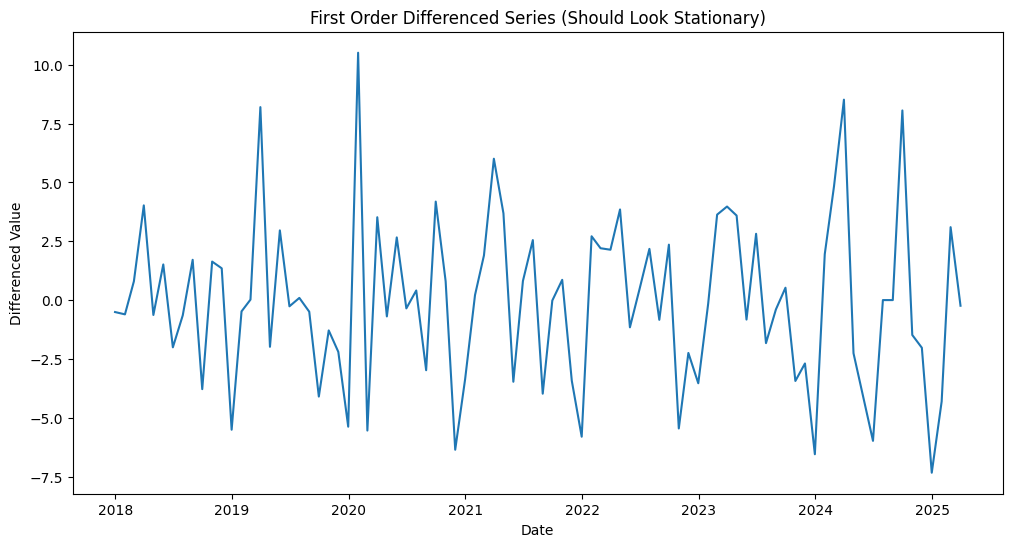

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data2_df['rate_transformed_diff'])
plt.title('First Order Differenced Series (Should Look Stationary)')
plt.xlabel('Date')
plt.ylabel('Differenced Value')
plt.show()

**ACF AND PACF PLOT**

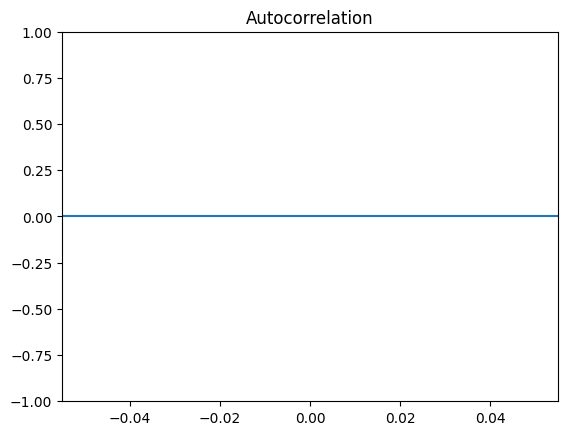

In [ ]:
lag_plot = plot_acf(data2_df['rate_transformed_diff'], lags=40)

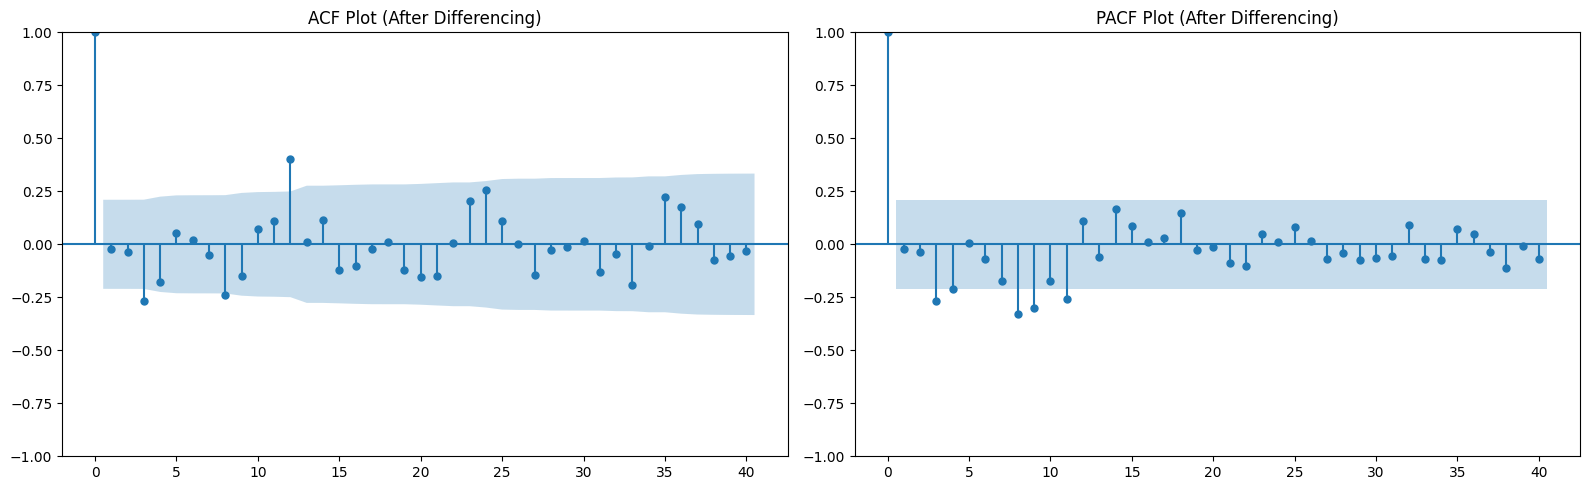

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16,5))

# ACF plot (for MA terms 'q')
plot_acf(data2_df['rate_transformed_diff'].dropna(), lags=40, ax=axes[0])
axes[0].set_title('ACF Plot (After Differencing)')

# PACF plot (for AR terms 'p')
plot_pacf(data2_df['rate_transformed_diff'].dropna(), lags=40, ax=axes[1], method='ywm')
axes[1].set_title('PACF Plot (After Differencing)')

plt.tight_layout()
plt.show()


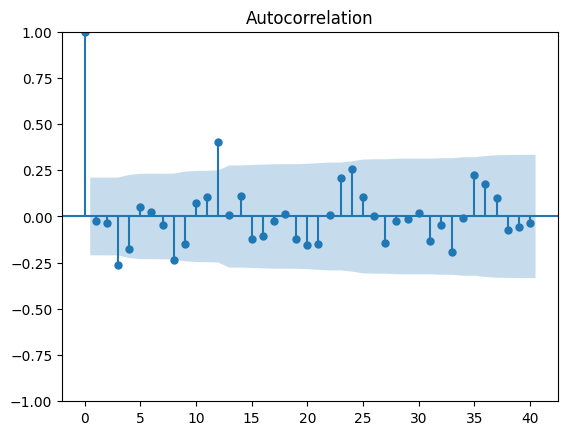

In [ ]:
plot_acf(rate_transformed_diff_dropna, lags=40);

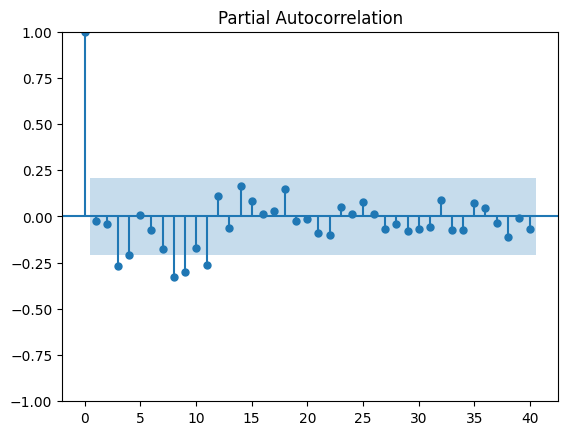

In [ ]:
plot_pacf(rate_transformed_diff_dropna, lags=40);

In [ ]:
from statsmodels.tsa.stattools import acf

# Calculate ACF values
acf_values = acf(data2_df['rate_transformed_diff'].dropna(), nlags=40)

# Display
for i, val in enumerate(acf_values):
    print(f"Lag {i}: ACF = {val:.4f}")


Lag 0: ACF = 1.0000
Lag 1: ACF = -0.0225
Lag 2: ACF = -0.0376
Lag 3: ACF = -0.2652
Lag 4: ACF = -0.1769
Lag 5: ACF = 0.0518
Lag 6: ACF = 0.0219
Lag 7: ACF = -0.0488
Lag 8: ACF = -0.2373
Lag 9: ACF = -0.1482
Lag 10: ACF = 0.0734
Lag 11: ACF = 0.1078
Lag 12: ACF = 0.4012
Lag 13: ACF = 0.0105
Lag 14: ACF = 0.1132
Lag 15: ACF = -0.1221
Lag 16: ACF = -0.1043
Lag 17: ACF = -0.0241
Lag 18: ACF = 0.0114
Lag 19: ACF = -0.1209
Lag 20: ACF = -0.1533
Lag 21: ACF = -0.1489
Lag 22: ACF = 0.0073
Lag 23: ACF = 0.2060
Lag 24: ACF = 0.2574
Lag 25: ACF = 0.1078
Lag 26: ACF = 0.0015
Lag 27: ACF = -0.1447
Lag 28: ACF = -0.0258
Lag 29: ACF = -0.0148
Lag 30: ACF = 0.0175
Lag 31: ACF = -0.1322
Lag 32: ACF = -0.0474
Lag 33: ACF = -0.1902
Lag 34: ACF = -0.0098
Lag 35: ACF = 0.2218
Lag 36: ACF = 0.1737
Lag 37: ACF = 0.0977
Lag 38: ACF = -0.0718
Lag 39: ACF = -0.0558
Lag 40: ACF = -0.0338


In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform Ljung-Box test
lb_test = acorr_ljungbox(data2_df['rate_transformed_diff'].dropna(), lags=[10], return_df=True)

print(lb_test)


      lb_stat  lb_pvalue
10  18.351161   0.049321


In [ ]:
lb_test = acorr_ljungbox(data2_df['rate_transformed_diff'].dropna(), lags=[10, 20, 30], return_df=True)
print(lb_test)


      lb_stat  lb_pvalue
10  18.351161   0.049321
20  44.776093   0.001183
30  64.975348   0.000221


***FITTING THE DATA FOR ARIMA MODEL***

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Suppose you chose ARIMA(p=1, d=1, q=1) based on ACF/PACF
model = ARIMA(data2_df['rate_transformed'], order=(1,1,1))
model_fit = model.fit()

# View summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:       rate_transformed   No. Observations:                   88
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -226.017
Date:                Thu, 01 May 2025   AIC                            458.033
Time:                        06:53:04   BIC                            465.431
Sample:                             0   HQIC                           461.012
                                 - 88                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6407      0.102      6.270      0.000       0.440       0.841
ma.L1         -0.9996      1.552     -0.644      0.520      -4.041       2.042
sigma2        10.2149     15.323      0.667      0.5

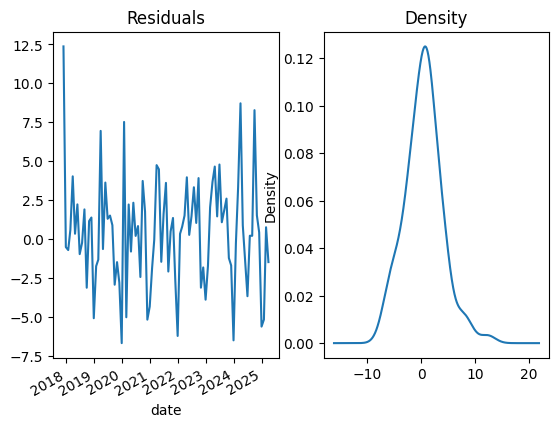

In [ ]:
import matplotlib.pyplot as plt
residuals = model_fit.resid
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Ljung-Box test on residuals
lb_test = acorr_ljungbox(residuals.dropna(), lags=[10, 20, 30], return_df=True)
print(lb_test)


      lb_stat  lb_pvalue
10  12.820216   0.233898
20  39.591999   0.005623
30  58.536326   0.001380


***SPLITING MY DATA INTO TRAIN AND TEST***

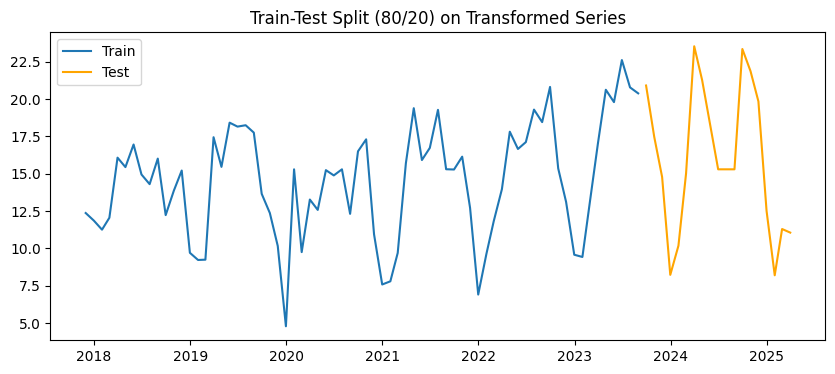

In [ ]:
import matplotlib.pyplot as plt

# Use transformed series
y = data2_df['rate_transformed']

# Calculate split index
split_index = int(len(y) * 0.8)

# Split
train = y[:split_index]
test = y[split_index:]

# Visualize the split
plt.figure(figsize=(10,4))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='orange')
plt.title('Train-Test Split (80/20) on Transformed Series')
plt.legend()
plt.show()



In [ ]:
train.tail()

,rate_transformed
date,
2023-04-30,20.617328
2023-05-31,19.789600
2023-06-30,22.606586
2023-07-31,20.776547
2023-08-31,20.377595


BUILDING THE FORECASTING MODELS ON TRAIN SET:
1. ARIMA
2. SARIMA
3. SES
4. HOLT LINEAR TREND
5. HOLT-WINTER(TRIPPLE EXP)
6. PROPHET



In [ ]:
forecast_horizon = len(test)

In [ ]:
split_point = int(len(data2_df) * 0.8)
train = data2_df['rate_transformed'].iloc[:split_point]
test = data2_df['rate_transformed'].iloc[split_point:]


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()


In [ ]:
start = len(train)
end = len(train) + len(test) - 1
arima_forecast = model_fit.predict(start=start, end=end, typ='levels')


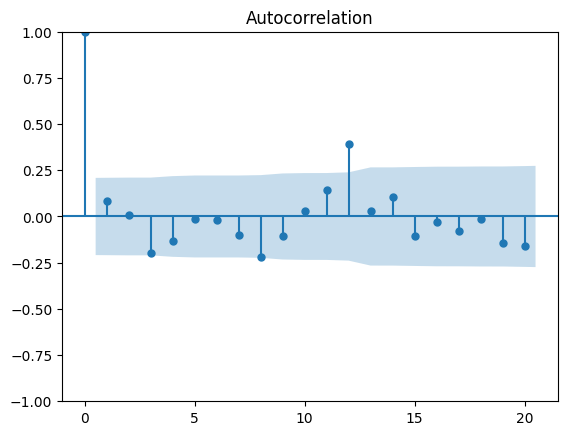

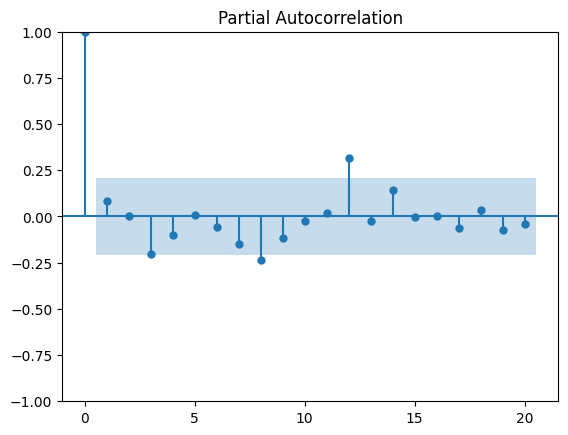

In [ ]:
acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

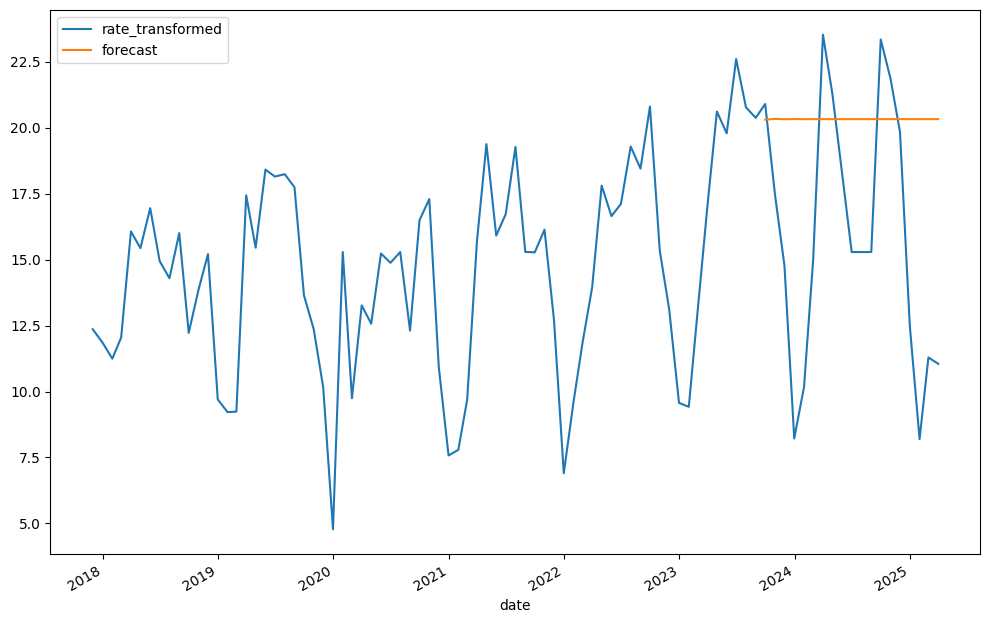

In [ ]:
forcast_test = model_fit.forecast(len(test))
data2_df['forecast'] = [None]*len(train) + list(forcast_test) # Use len(train) instead of data2_df(train)
data2_df[['rate_transformed', 'forecast']].plot(figsize=(12, 8))
plt.show()

In [ ]:
from scipy.special import inv_boxcox

arima_forecast_inverted = inv_boxcox(arima_forecast, fitted_lambda)
test_inverted = inv_boxcox(test, fitted_lambda)
train_inverted = inv_boxcox(train, fitted_lambda)


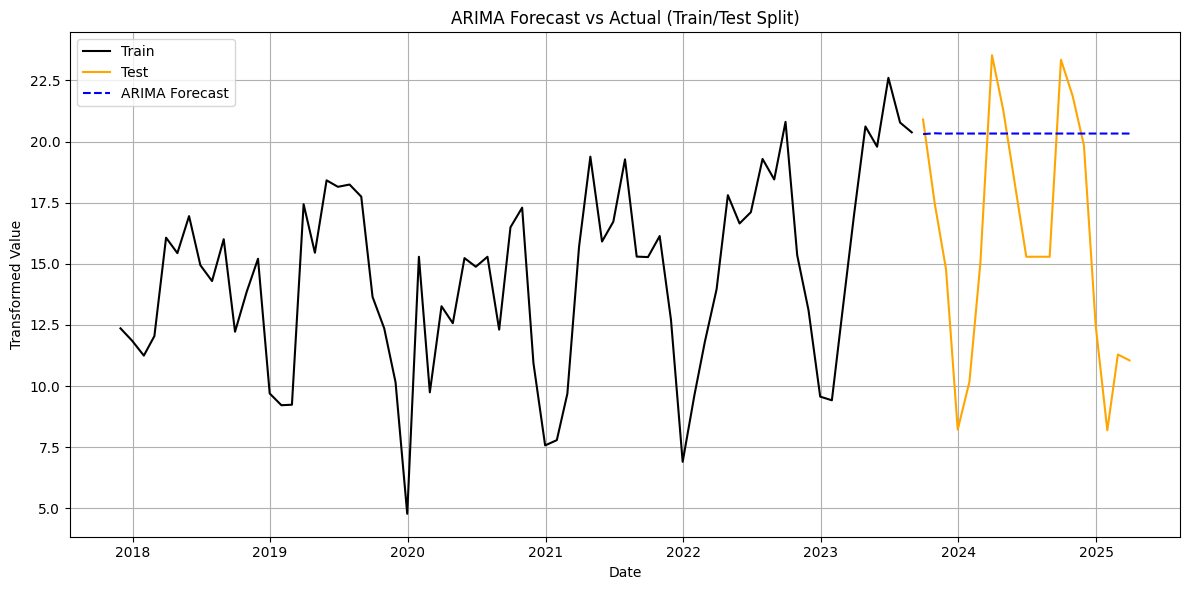

In [ ]:
import matplotlib.pyplot as plt



plt.figure(figsize=(12,6))

# Uncomment these if using inverted values
# plt.plot(train.index, train_inverted, label='Train', color='black')
# plt.plot(test.index, test_inverted, label='Test', color='orange')
# plt.plot(test.index, arima_forecast_inverted, label='ARIMA Forecast', color='blue', linestyle='--')

# Use transformed if not inverting
plt.plot(train.index, train, label='Train', color='black')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='blue', linestyle='--')

plt.title('ARIMA Forecast vs Actual (Train/Test Split)')
plt.xlabel('Date')
plt.ylabel('Transformed Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

***AUTO FIT THE ARIMA MODEL***

In [ ]:
!pip install numpy==1.25.2 # Change the version to your desired numpy version if needed

In [ ]:
!pip install pmdarima
import pmdarima as pm
auto_arima = pm.auto_arima(train, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(4, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   70
Model:               SARIMAX(4, 0, 1)   Log Likelihood                -175.780
Date:                Thu, 01 May 2025   AIC                            363.561
Time:                        06:53:33   BIC                            377.052
Sample:                    11-30-2017   HQIC                           368.920
                         - 08-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6387      0.120     13.609      0.000       1.403       1.875
ar.L2         -0.5283      0.222     -2.382      0.017      -0.963      -0.094
ar.L3         -0.3807      0.275     -1.383      0.167      -0.920       0.159
ar.L4          0.2702      0.151      1.791      0.073      -0.025       0.566
ma.L1         -0.9582      0.129     -7.404      0.000      -1.212      -0.705
sigma2         8.2493      1.547      5.333      0.000       5.217      11.281
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                 1.26
Prob(Q):                              0.54   Prob(JB):                         0.53
Heteroskedasticity (H):               1.21   Skew:                            -0.31
Prob(H) (two-sided):                  0.65   Kurtosis:                         3.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

***Evaluate Model Predictions ***

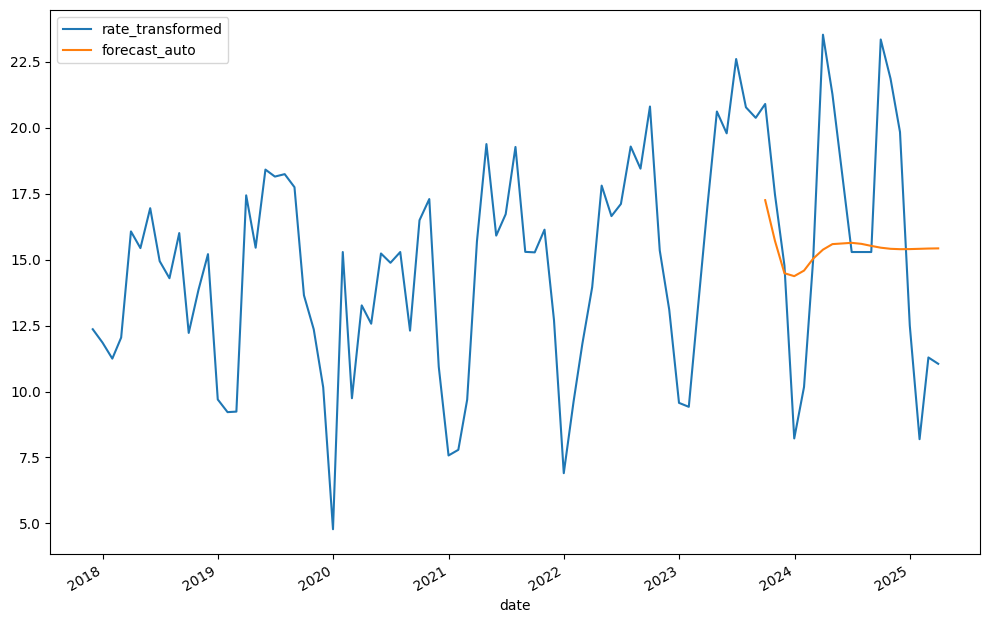

In [ ]:
forecast_test_auto = auto_arima.predict(n_periods=len(test))
data2_df['forecast_auto'] = [None]*len(train) + list(forecast_test_auto) # Use len(train) instead of data2_df(train)
data2_df[['rate_transformed', 'forecast_auto']].plot(figsize=(12, 8))
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Example with seasonal order (1,1,1,12) for monthly data
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_fit = model.fit()
sarima_forecast = sarima_fit.forecast(steps=len(test))


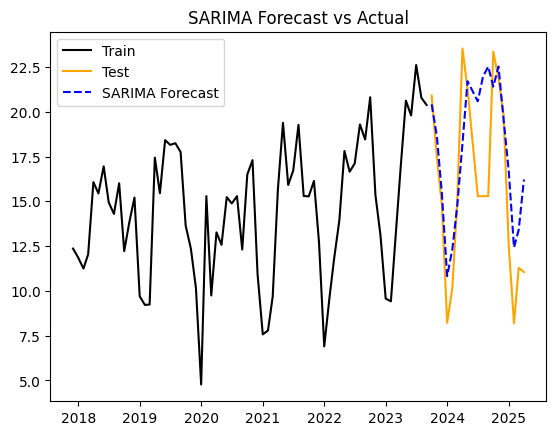

In [ ]:
plt.plot(train.index, train, label='Train', color='black')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='blue', linestyle='--')
plt.legend()
plt.title('SARIMA Forecast vs Actual')
plt.show()


***HOLT WINTER OR TRIPPLE EXPONENTIALS SMOOTHING***

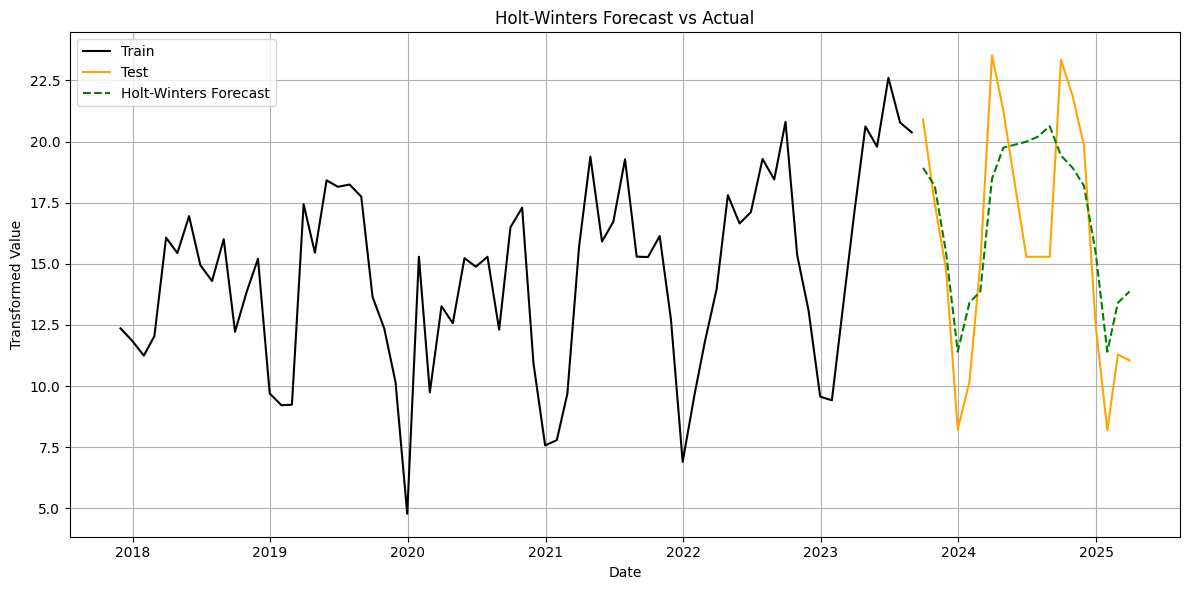

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw_model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12)
hw_fit = hw_model.fit()
hw_forecast = hw_fit.forecast(len(test))


# Plot results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train', color='black')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(test.index, hw_forecast, label='Holt-Winters Forecast', color='green', linestyle='--')

plt.title('Holt-Winters Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Transformed Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
